In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import gmaps
from pygeocoder import Geocoder
import os
import scipy.stats as sps


In [2]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [3]:
haz_project_state = haz_project[['state', 'disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
state_project = haz_project_state.dropna()
state_project

,state,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.00,1.371,21420.0,DR-1971-0561-R
1,Alabama,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.00,1.371,21420.0,DR-1971-0428-R
2,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.00,4.460,3181553.0,DR-1971-0430-R
3,Alabama,1971.0,601.1: Generators,0,0,42578.0,31934.00,0.000,0.0,DR-1971-0373-F
4,Alabama,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.00,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...,...
29187,Texas,5233.0,206.1: Safe Room (Tornado and Severe Wind Shel...,1,0,1890000.0,990000.00,1.400,229307.0,DR-5233-0011-R
29189,New Jersey,4086.0,602.1: Other Equipment Purchase and Installation,0,0,73430.0,66087.00,5.969,517419.0,DR-4086-0646-R
29190,Washington,4243.0,200.1: Acquisition of Private Real Property (S...,1,1,1535117.0,1151337.75,1.532,2351083.0,DR-4243-0009-R
29192,New Jersey,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.00,0.000,0.0,DR-4086-0647-R


In [4]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']].drop_duplicates(subset="disasterNumber")
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59392,3530,TX,EM,2020,Hurricane
59424,5323,WA,FM,2020,Fire
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


In [5]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Dam/Levee Break        6
Volcano                6
Fishing Losses         6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [65]:
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state', 'incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

In [7]:
disaster_sum_clean["incidentType"].value_counts()

Fire                1403
Severe Storm(s)      982
Flood                836
Hurricane            374
Tornado              170
Snow                 165
Biological           157
Severe Ice Storm      62
Typhoon               58
Drought               46
Earthquake            35
Coastal Storm         29
Other                 26
Freezing              18
Toxic Substances       8
Mud/Landslide          7
Dam/Levee Break        6
Volcano                6
Fishing Losses         6
Human Cause            4
Tsunami                3
Terrorist              2
Chemical               1
Name: incidentType, dtype: int64

In [8]:
state_coords = pd.read_csv('state_lat_lng.csv')

lat_lng = pd.merge(state_coords, disaster_sum_clean, on='state')
lat_lng

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
0,AK,63.588753,-154.493062,Alaska,13,DR,1954,Other
1,AK,63.588753,-154.493062,Alaska,31,DR,1955,Other
2,AK,63.588753,-154.493062,Alaska,46,DR,1956,Other
3,AK,63.588753,-154.493062,Alaska,168,DR,1964,Earthquake
4,AK,63.588753,-154.493062,Alaska,230,DR,1967,Flood
...,...,...,...,...,...,...,...,...
4283,WY,43.075968,-107.290284,Wyoming,5139,FM,2016,Fire
4284,WY,43.075968,-107.290284,Wyoming,5241,FM,2018,Fire
4285,WY,43.075968,-107.290284,Wyoming,5276,FM,2018,Fire
4286,WY,43.075968,-107.290284,Wyoming,3479,EM,2020,Biological


In [9]:
huri_df = lat_lng[lat_lng["incidentType"] == "Hurricane"]
huri_df

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType
72,AL,32.318231,-86.902298,Alabama,280,DR,1970,Hurricane
83,AL,32.318231,-86.902298,Alabama,598,DR,1979,Hurricane
88,AL,32.318231,-86.902298,Alabama,742,DR,1985,Hurricane
97,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane
103,AL,32.318231,-86.902298,Alabama,1250,DR,1998,Hurricane
...,...,...,...,...,...,...,...,...
4186,WV,38.597626,-80.454903,West Virginia,278,DR,1969,Hurricane
4212,WV,38.597626,-80.454903,West Virginia,1496,DR,2003,Hurricane
4231,WV,38.597626,-80.454903,West Virginia,3221,EM,2005,Hurricane
4233,WV,38.597626,-80.454903,West Virginia,3358,EM,2013,Hurricane


In [10]:
huri_projects = pd.merge(huri_df, haz_project_clean, on="disasterNumber" )
huri_projects

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,29,29,204823.0,82917.0,1.424,1190674.0,DR-1070-0018-R
1,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,403.1: Stormwater Management - Culverts,0,0,125183.0,93887.0,2.144,297878.0,DR-1070-0024-R
2,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,609088.0,456816.0,0.000,0.0,DR-1070-0019-R
3,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,202.1: Elevation of Private Structures - Riverine,8,8,456965.0,343172.0,2.056,936409.0,DR-1070-0016-R
4,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,600.1: Warning Systems (as a Component of a Pl...,0,0,445362.0,334051.0,0.000,0.0,DR-1070-0013-F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5744,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,91.1: Local Multihazard Mitigation Plan,0,0,50900.0,38175.0,0.000,0.0,DR-4093-0006-P
5745,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,810162.0,607622.0,1.009,817170.0,DR-4093-0001-R
5746,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,4,4,465350.0,349012.0,1.052,489455.0,DR-4093-0003-R
5747,WV,38.597626,-80.454903,West Virginia,4093,DR,2013,Hurricane,200.1: Acquisition of Private Real Property (S...,6,6,602384.0,451788.0,1.526,919305.0,DR-4093-0004-R


In [11]:
huri_summary = huri_projects.groupby(['state', 'disasterNumber', 'projectType', 'projectIdentifier' ]).mean()
huri_summary

latitude  \
state disasterNumber projectType                                        projectIdentifier              
AL    1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R     32.318231   
                                                                        DR-1070-0004-R     32.318231   
                                                                        DR-1070-0010-R     32.318231   
                                                                        DR-1070-0015-R     32.318231   
                                                                        DR-1070-0018-R     32.318231   
...                                                                                              ...   
WV    4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R     38.597626   
                                                                        DR-4093-0004-R     38.597626   
                                                                        DR-4093-0005-R     38.597626   
                     601.1: Generators                                  DR-4093-0007-F     38.597626   
                     91.1: Local Multihazard Mitigation Plan            DR-4093-0006-P     38.597626   

                                                                                           longitude  \
state disasterNumber projectType                                        projectIdentifier              
AL    1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R    -86.902298   
                                                                        DR-1070-0004-R    -86.902298   
                                                                        DR-1070-0010-R    -86.902298   
                                                                        DR-1070-0015-R    -86.902298   
                                                                        DR-1070-0018-R    -86.902298   
...                                                                                              ...   
WV    4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R    -80.454903   
                                                                        DR-4093-0004-R    -80.454903   
                                                                        DR-4093-0005-R    -80.454903   
                     601.1: Generators                                  DR-4093-0007-F    -80.454903   
                     91.1: Local Multihazard Mitigation Plan            DR-4093-0006-P    -80.454903   

                                                                                           fyDeclared  \
state disasterNumber projectType                                        projectIdentifier               
AL    1070           200.1: Acquisition of Private Real Property (St... DR-1070-0003-R           1996   
                                                                        DR-1070-0004-R           1996   
                                                                        DR-1070-0010-R           1996   
                                                                        DR-1070-0015-R           1996   
                                                                        DR-1070-0018-R           1996   
...                                                                                               ...   
WV    4093           200.1: Acquisition of Private Real Property (St... DR-4093-0003-R           2013   
                                                                        DR-4093-0004-R           2013   
                                                                        DR-4093-0005-R           2013   
                     601.1: Generators                                  DR-4093-0007-F           2013   
                     91.1: Local Multihazard Mitigation Plan            DR-4093-0006-P           2013   

                    

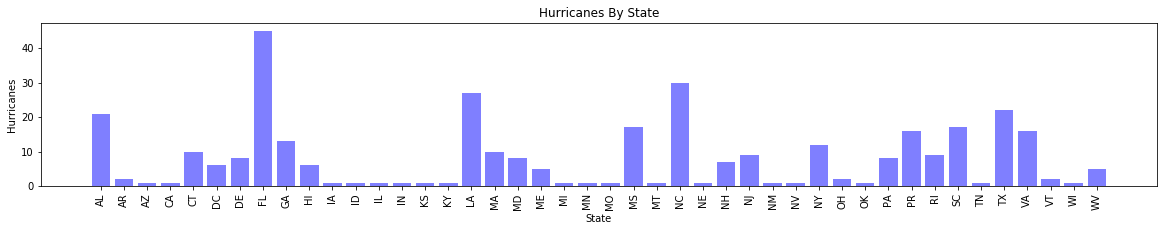

<Figure size 432x288 with 0 Axes>

In [18]:
number_huri = huri_df.groupby("state")[["disasterNumber"]].count()
number_huri = number_huri.iloc[:,0]
x_axis = np.arange(len(number_huri))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, number_huri, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, number_huri.index, rotation="vertical")
plt.title("Hurricanes By State")
plt.xlabel("State")
plt.ylabel("Hurricanes")
plt.show()
plt.savefig("output_data/hurricaines_by_state.png")

In [34]:
state_huris = huri_df.groupby("state")[["disasterNumber"]].count()
state_huris

,disasterNumber
state,
AL,21
AR,2
AZ,1
CA,1
CT,10
DC,6
DE,8
FL,45
GA,13


In [15]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount']]
hazard_sum_clean

,disasterNumber,obligatedTotalAmount
0,1071,2834575.0
1,1337,782081.0
2,1326,333150.0
3,1506,1791043.0
4,1211,413384.0
...,...,...
1731,4551,0.0
1732,4556,0.0
1733,4553,0.0
1734,4554,0.0


In [16]:
huri_funds = pd.merge(huri_df, hazard_sum_clean, on="disasterNumber")

huri_funds

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,6427682.00
1,AL,32.318231,-86.902298,Alabama,1250,DR,1998,Hurricane,6689836.00
2,AL,32.318231,-86.902298,Alabama,1438,DR,2003,Hurricane,716877.00
3,AL,32.318231,-86.902298,Alabama,1549,DR,2004,Hurricane,37574846.00
4,AL,32.318231,-86.902298,Alabama,1593,DR,2005,Hurricane,992916.00
...,...,...,...,...,...,...,...,...,...
152,VA,37.431573,-78.656894,Virginia,4411,DR,2019,Hurricane,2589790.25
153,VA,37.431573,-78.656894,Virginia,4401,DR,2019,Hurricane,1177456.75
154,VT,44.558803,-72.577841,Vermont,4022,DR,2011,Hurricane,29613730.78
155,WV,38.597626,-80.454903,West Virginia,1496,DR,2003,Hurricane,0.00


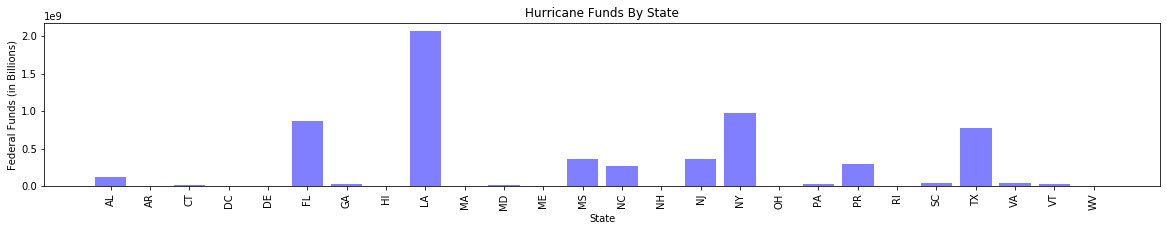

<Figure size 432x288 with 0 Axes>

In [17]:
huri_number_funds = huri_funds.groupby("state")[["obligatedTotalAmount"]].sum()
huri_number_funds = huri_number_funds.iloc[:,0]
x_axis = np.arange(len(huri_number_funds))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, huri_number_funds, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, huri_number_funds.index, rotation="vertical")
plt.title("Hurricane Funds By State")
plt.xlabel("State")
plt.ylabel("Federal Funds (in Billions)")
plt.show()
plt.savefig("output_data/hurricane_funds_by_state.png")

In [52]:
katrina = huri_funds[huri_funds["disasterNumber"] == 1603]
katrina

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
59,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,1.618461e+09


In [49]:
katrina_projects = huri_projects[huri_projects["disasterNumber"] == 1603]
katrina_projects

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
2366,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,403.2: Stormwater Management - Diversions,0,0,39074.0,39074.00,1.046,1355914.0,DR-1603-0360-R
2367,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,403.3: Stormwater Management - Flapgates/Flood...,0,0,3227168.0,3227167.94,1.907,6455830.0,DR-1603-0243-R
2368,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,403.1: Stormwater Management - Culverts; \n405...,1,1,2692609.0,2692609.00,1.097,3160223.0,DR-1603-0242-R
2369,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,"103.1: Feasibility, Engineering and Design Stu...",0,0,25091.0,25091.00,3.009,690738.0,DR-1603-0165-R
2370,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,202.1: Elevation of Private Structures - Riverine,1,1,146260.0,146260.00,1.115,165540.0,DR-1603-0270-R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,403.3: Stormwater Management - Flapgates/Flood...,1,0,4609549.0,963265.00,1.014,5129562.0,DR-1603-0427-R
2705,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,202.1: Elevation of Private Structures - Riverine,1,1,252800.0,252800.00,1.196,370048.0,DR-1603-0035-R
2706,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,200.1: Acquisition of Private Real Property (S...,13,13,1687799.0,1687799.00,1.185,2644685.0,DR-1603-0082-R
2707,LA,31.244823,-92.145024,Louisiana,1603,DR,2005,Hurricane,202.2: Elevation of Private Structures - Coastal,1,1,86448.0,86448.00,1.480,183376.0,DR-1603-0025-R


In [35]:
state_funds = huri_funds.groupby("state")[["obligatedTotalAmount"]].sum()
state_funds

,obligatedTotalAmount
state,
AL,1.219043e+08
AR,6.089540e+05
CT,1.789467e+07
DC,1.701000e+05
DE,2.090743e+06
FL,8.650535e+08
GA,2.618685e+07
HI,3.861727e+06
LA,2.072860e+09


In [40]:
huri_state_merge = pd.merge(state_funds, state_huris, on="state")
huri_state_merge["obligatedTotalAmount"].sort_values(ascending=False)

state
LA    2.072860e+09
NY    9.723742e+08
FL    8.650535e+08
TX    7.716226e+08
MS    3.627005e+08
NJ    3.580088e+08
PR    3.002974e+08
NC    2.714589e+08
AL    1.219043e+08
SC    4.660344e+07
VA    4.028952e+07
VT    2.961373e+07
GA    2.618685e+07
PA    2.499100e+07
CT    1.789467e+07
MD    1.413917e+07
MA    6.960506e+06
HI    3.861727e+06
OH    3.763547e+06
RI    2.603074e+06
WV    2.253069e+06
DE    2.090743e+06
NH    2.051028e+06
ME    7.938890e+05
AR    6.089540e+05
DC    1.701000e+05
Name: obligatedTotalAmount, dtype: float64

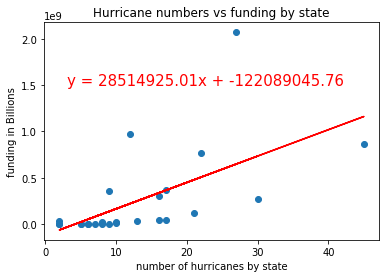

In [58]:
state_funds = huri_state_merge["obligatedTotalAmount"]
state_disasters = huri_state_merge["disasterNumber"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(state_disasters, state_funds)
regress_values = state_disasters * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(state_disasters, state_funds)
plt.plot(state_disasters, regress_values, "r-")
plt.annotate(line_eq,(3, 1500000000),fontsize=15,color="red")
plt.xlabel("number of hurricanes by state")
plt.ylabel("funding in Billions")
plt.title("Hurricane numbers vs funding by state")
plt.savefig("output_data/hurricane_number_vs_funding")

In [54]:
no_la = huri_funds[huri_funds["disasterNumber"] != 1603]
no_la

,state,latitude,longitude,state_name,disasterNumber,declarationType,fyDeclared,incidentType,obligatedTotalAmount
0,AL,32.318231,-86.902298,Alabama,1070,DR,1996,Hurricane,6427682.00
1,AL,32.318231,-86.902298,Alabama,1250,DR,1998,Hurricane,6689836.00
2,AL,32.318231,-86.902298,Alabama,1438,DR,2003,Hurricane,716877.00
3,AL,32.318231,-86.902298,Alabama,1549,DR,2004,Hurricane,37574846.00
4,AL,32.318231,-86.902298,Alabama,1593,DR,2005,Hurricane,992916.00
...,...,...,...,...,...,...,...,...,...
152,VA,37.431573,-78.656894,Virginia,4411,DR,2019,Hurricane,2589790.25
153,VA,37.431573,-78.656894,Virginia,4401,DR,2019,Hurricane,1177456.75
154,VT,44.558803,-72.577841,Vermont,4022,DR,2011,Hurricane,29613730.78
155,WV,38.597626,-80.454903,West Virginia,1496,DR,2003,Hurricane,0.00


In [55]:
no_la_funds = no_la.groupby("state")[["obligatedTotalAmount"]].sum()
no_la_funds

,obligatedTotalAmount
state,
AL,1.219043e+08
AR,6.089540e+05
CT,1.789467e+07
DC,1.701000e+05
DE,2.090743e+06
FL,8.650535e+08
GA,2.618685e+07
HI,3.861727e+06
LA,4.543983e+08


In [56]:
no_la_merge = pd.merge(no_la_funds, state_huris, on="state")
no_la_merge

,obligatedTotalAmount,disasterNumber
state,,
AL,1.219043e+08,21
AR,6.089540e+05,2
CT,1.789467e+07,10
DC,1.701000e+05,6
DE,2.090743e+06,8
FL,8.650535e+08,45
GA,2.618685e+07,13
HI,3.861727e+06,6
LA,4.543983e+08,27


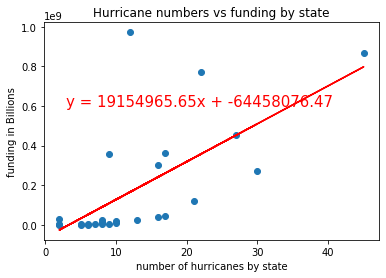

In [63]:
state_funds = no_la_merge["obligatedTotalAmount"]
state_disasters = no_la_merge["disasterNumber"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(state_disasters, state_funds)
regress_values = state_disasters * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + "  + str(round(intercept, 2))
plt.scatter(state_disasters, state_funds)
plt.plot(state_disasters, regress_values, "r-")
plt.annotate(line_eq,(3, 600000000),fontsize=15,color="red")
plt.xlabel("number of hurricanes by state")
plt.ylabel("funding in Billions")
plt.title("Hurricane numbers vs funding by state")
plt.savefig("output_data/no_la_number_vs_funding")

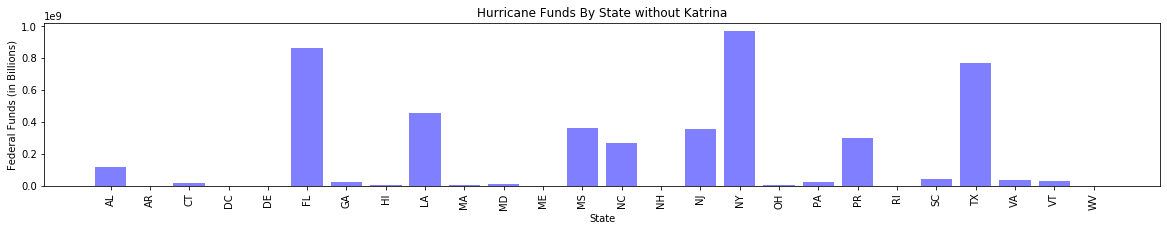

<Figure size 432x288 with 0 Axes>

In [62]:
no_la_bar = no_la_merge.groupby("state")[["obligatedTotalAmount"]].sum()
no_la_graph = no_la_bar.iloc[:,0]
x_axis = np.arange(len(no_la_graph))
tick_place = [value + 0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, no_la_graph, color="b", alpha=0.5, align="edge")
plt.xticks(tick_place, huri_number_funds.index, rotation="vertical")
plt.title("Hurricane Funds By State without Katrina")
plt.xlabel("State")
plt.ylabel("Federal Funds (in Billions)")
plt.show()
plt.savefig("output_data/no_katrina.png")